In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
data = pd.read_csv("data/telescope.csv")
X = data.drop(columns="class")
y = data["class"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [4]:
ss=StandardScaler().set_output(transform="pandas").fit(X_train)

In [5]:
filter_ = SelectKBest(k="all").fit(ss.transform(X_train), y_train)

In [6]:
columns = X_train.columns[ filter_.pvalues_ <= 0.05 ]

In [7]:
scaler = StandardScaler().fit(X_train[columns])
svm = SVC().fit(
    scaler.transform(X_train[columns]), y_train
)
svm.score(
    scaler.transform(X_train[columns]), y_train
)

0.874211356466877

In [8]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay, confusion_matrix

In [9]:
matthews_corrcoef(
    svm.predict(
        scaler.transform(X_train[columns])
    ), y_train
)

0.7198859615948475

In [10]:
preds = svm.predict(
    scaler.transform(X_test[columns])
)

In [11]:
svm.score(scaler.transform(X_test[columns]), y_test)

0.8659305993690851

In [12]:
matthews_corrcoef(preds, y_test)

0.7049996248596108

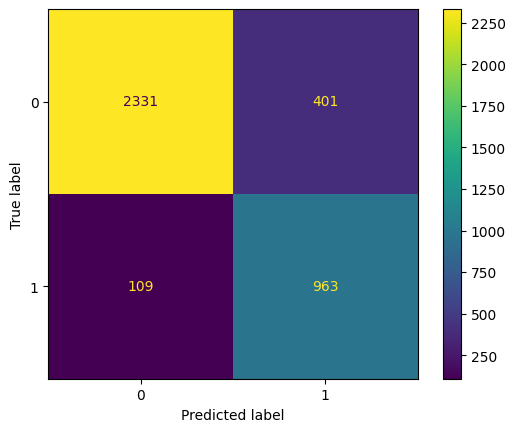

In [13]:
ConfusionMatrixDisplay(
    confusion_matrix(preds, y_test)
).plot()